In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
df = pd.read_csv("Ice_cream selling data.csv")

# Display first few rows
df.head()


,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [3]:
df.columns


Index(['Temperature (°C)', 'Ice Cream Sales (units)'], dtype='object')

In [4]:

# simplify the column names
new_df = df.rename(columns={
    'Temperature (°C)': 'Temperature',
    'Ice Cream Sales (units)': 'Sales'
})

# Let's check it
print(new_df.head())


   Temperature      Sales
0    -4.662263  41.842986
1    -4.316559  34.661120
2    -4.213985  39.383001
3    -3.949661  37.539845
4    -3.578554  32.284531


In [5]:
new_df.info()
new_df.describe()
new_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  49 non-null     float64
 1   Sales        49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


Temperature    0
Sales          0
dtype: int64

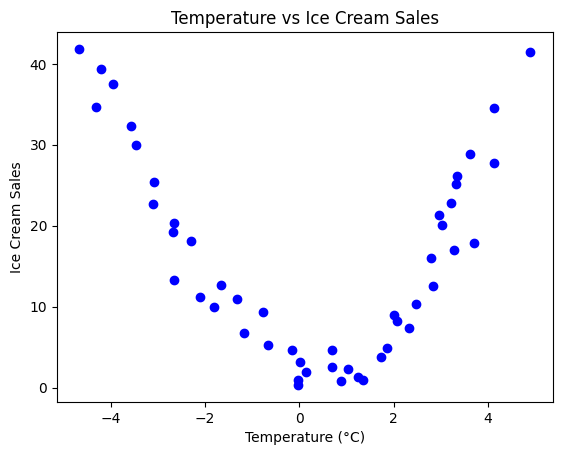

In [6]:
import matplotlib.pyplot as plt

plt.scatter(new_df['Temperature'], new_df['Sales'], color='blue')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales')
plt.title('Temperature vs Ice Cream Sales')
plt.show()


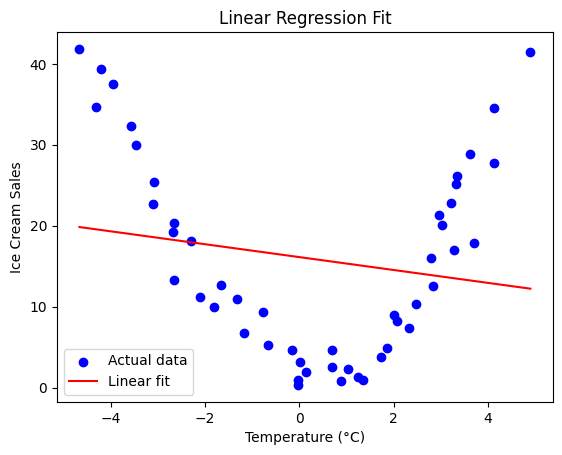

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Features and target
X = new_df[['Temperature']]   # must be 2D
y = new_df['Sales']

# Fit Linear Regression ----- the model
lin_model = LinearRegression()
lin_model.fit(X, y)

# Predictions
y_pred_lin = lin_model.predict(X)

# Plot
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred_lin, color='red', label='Linear fit')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()


In [14]:
print("MSE:", mean_squared_error(y, y_pred_lin))
print("R2 Score:", r2_score(y, y_pred_lin))

MSE: 142.83040442368952
R2 Score: 0.030689536411547258


In [8]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)  # transforms X into [X, X^2]

# Fit Linear Regression on polynomial features
poly_model = LinearRegression()
poly_model.fit(X_poly, y)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


/Users/tkmagesh77/Documents/Training/Nutanix-Beginner-ML-Aug-2025/ml_practice/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


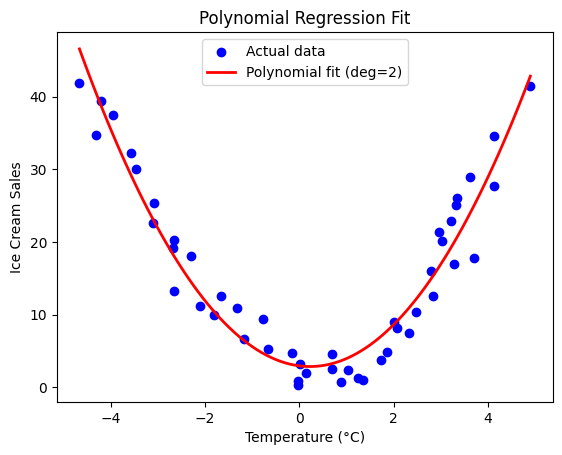

In [9]:
# Predictions for plotting
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
X_range_poly = poly.transform(X_range)
y_poly_pred = poly_model.predict(X_range_poly)

plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X_range, y_poly_pred, color='red', linewidth=2, label='Polynomial fit (deg=2)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()

In [10]:
poly = PolynomialFeatures(degree=3, include_bias=False)
# repeat same steps


In [11]:
from sklearn.metrics import mean_squared_error, r2_score

y_poly_train_pred = poly_model.predict(X_poly)
print("MSE:", mean_squared_error(y, y_poly_train_pred))
print("R2 Score:", r2_score(y, y_poly_train_pred))


MSE: 10.00322059498249
R2 Score: 0.9321137090423877


In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Features and target
X = new_df[['Temperature']]
y = new_df['Sales']

# Create polynomial features and fit
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)  # fit + transform on training data

poly_model = LinearRegression()
poly_model.fit(X_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
# Now you can safely transform new data
new_temps = [[18], [22], [27], [33]]
new_temps_poly = poly.transform(new_temps)
predicted_sales = poly_model.predict(new_temps_poly)

for temp, sale in zip(new_temps, predicted_sales):
    print(f"Temperature: {temp[0]}°C -> Predicted Sales: {sale:.2f} units")


Temperature: 18°C -> Predicted Sales: 580.87 units
Temperature: 22°C -> Predicted Sales: 870.30 units
Temperature: 27°C -> Predicted Sales: 1314.41 units
Temperature: 33°C -> Predicted Sales: 1968.09 units


/Users/tkmagesh77/Documents/Training/Nutanix-Beginner-ML-Aug-2025/ml_practice/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
